## TP1

In [8]:
K = 4
alpha = [1, 1, 1, 1]  # Dirichlet params
PI = [0.1, 0.2, 0.65, 0.05]  

# Sanity check 
if not abs(sum(PI) - 1) < 1e-8:
    raise ValueError("Probabilities do not sum to 1.")


### Question 1

In [9]:
import random

def simu_multi(N, PI):
    counts = [0 for _ in range(K)]

    for _ in range(N):
        pick = random.choices([i for i in range(len(PI))], weights=PI, k=1)
        counts[pick[0]] += 1
    return counts

simu_multi(100, PI)


[12, 21, 60, 7]

### Question 2

In [10]:
import numpy as np

# on fixe des valeurs 
counts = [1, 22, 67, 3]
N=100 

def PI_MLE(X, N ):
    return np.array([x_k / N for x_k in X])
    
def PI_Bayes(X, alpha):
    X =np.array(alpha)
    alpha =np.array(alpha)
    return (X + alpha)/np.sum(X +alpha)



In [11]:
PI_MLE(counts, N), PI_Bayes(counts, alpha)

(array([0.01, 0.22, 0.67, 0.03]), array([0.25, 0.25, 0.25, 0.25]))

#skewed dist vs uniform dist 

In [13]:
l1_norm = np.linalg.norm(PI_MLE(counts, N)- PI_Bayes(counts, alpha), ord=1)
l1_norm

0.91

#considerable difference

### Question 3 (empirical comparison)

In [22]:
n_exp = 100
# Ns = list(range(10, 1001, 10)) + [1000]
Ns = list(range(10, 1001, 10)) 


In [28]:
avg_relative_errors = []
avg_freq_errors = []
avg_bayes_errors = []

In [29]:
for N in Ns:
    relative_errors = []
    freq_errors = []
    bayes_errors = []
    
    for _ in range(n_exp):
        counts = simu_multi(N, PI)
        mle = PI_MLE(counts, N)
        bayes = PI_Bayes(counts, alpha)
        
    
        relative_error = np.linalg.norm(mle- bayes, ord=1)
        freq_error =np.linalg.norm(mle - PI, ord=1)
        bayes_error = np.linalg.norm(bayes- PI, ord=1)

        relative_errors.append(relative_error)
        freq_errors.append(freq_error)
        bayes_errors.append(bayes_error)

    avg_relative_errors.append(np.mean(relative_errors))
    avg_freq_errors.append(np.mean(freq_errors))
    avg_bayes_errors.append(np.mean(bayes_errors))
    

#average errors
np.mean(avg_relative_errors),np.mean(avg_freq_errors),np.mean(avg_bayes_errors)




(0.8016278063132921, 0.06449848358033676, 0.7999999999999997)

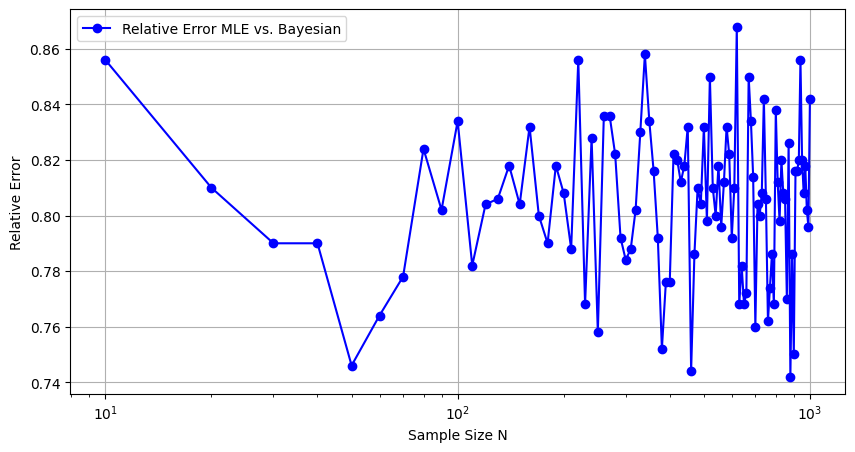

In [30]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.plot(Ns, relative_errors, marker='o', linestyle='-', color='b', label='Relative Error MLE vs. Bayesian')
plt.xscale('log') 
plt.xlabel('Sample Size N')
plt.ylabel('Relative Error')
plt.legend()
plt.grid(True)
plt.show()

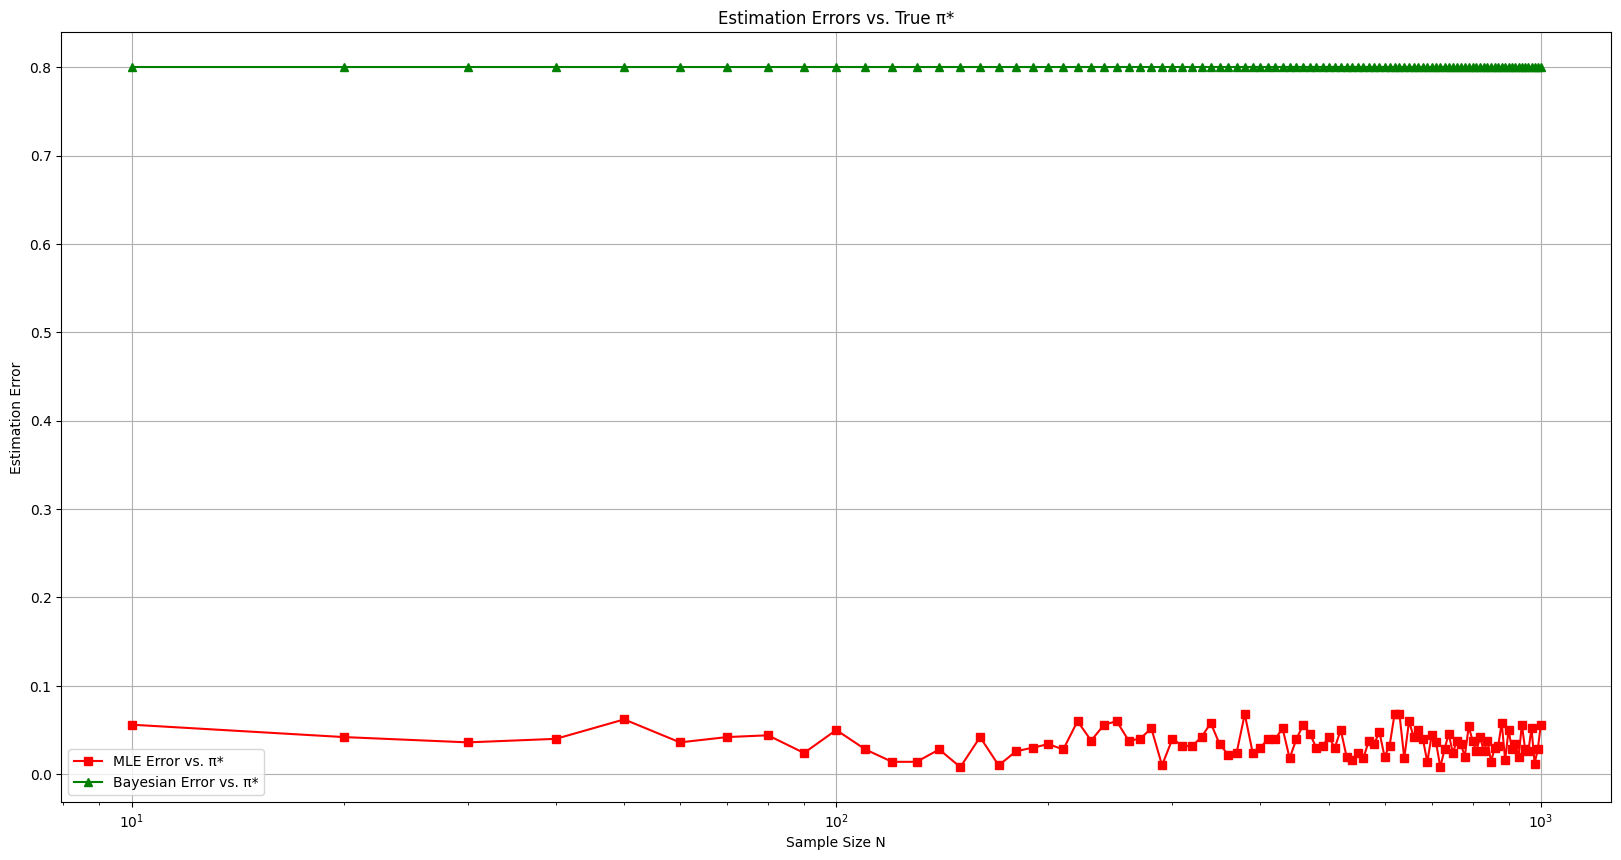

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(Ns, freq_errors, marker='s', linestyle='-', color='r', label='MLE Error vs. π*')
plt.plot(Ns, bayes_errors, marker='^', linestyle='-', color='g', label='Bayesian Error vs. π*')
plt.xscale('log')
plt.xlabel('Sample Size N')
plt.ylabel('Estimation Error')
plt.title('Estimation Errors vs. True π*')
plt.grid(True)
plt.legend()